# Lab 3: Experimentación de hiperparámetros.

*   Elemento de lista
*   Elemento de lista





El objetivo de este laboratorio es experimentar con los conceptos teoricos vistos en clase. Se propone seguir la estructura de experimentos del documento. Como hemos visto durante el tema es muy importante vuestra conclusión después del experimento.

Para evaluar con cual nos quedamos después de cada experimento vamos a quedarnos con el que tenga mejor Accuracy en los datos de validación.

El dataset a utilizar consiste en imágenes de personajes de los Simpsons extraídas directamente de capítulos de la serie. Este dataset ha sido recopilado por [Alexandre Attia](http://www.alexattia.fr/) y es más complejo que el dataset de Fashion MNIST que hemos utilizado hasta ahora. Aparte de tener más clases (vamos a utilizar los 18 personajes con más imágenes), los personajes pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros personajes en pantalla (si bien el personaje a clasificar siempre aparece en la posición predominante).

El dataset de training puede ser descargado desde aquí:

[Training data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60) (~500MB)

Por otro lado, el dataset de test puede ser descargado de aquí:

[Test data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8) (~10MB)

Antes de empezar la práctica, se recomienda descargar las imágenes y echarlas un vistazo.

## Carga de los datos

In [ ]:
import cv2
import os
import numpy as np 
import keras
import matplotlib.pyplot as plt
import glob


# Primero, bajamos los datos de entrenamiento
keras.utils.get_file(fname="simpsons_train.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60")

# Descomprimimos el archivo
!tar -xzf /root/.keras/datasets/simpsons_train.tar.gz -C /root/.keras/datasets

# Hacemos lo mismo con los datos de test
keras.utils.get_file(fname="simpsons_test.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8")
!tar -xzf /root/.keras/datasets/simpsons_test.tar.gz -C /root/.keras/datasets

10658925/10658925 [==============================] - 3s 0us/step


In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [ ]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.
    
    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.
    
    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas
     
    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

In [ ]:
def load_test_set(dirname, map_characters, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)


In [ ]:
# Cargamos los datos. Si no estás trabajando en colab, cambia los paths por
# los de los ficheros donde hayas descargado los datos.
DATASET_TRAIN_PATH_COLAB = "/root/.keras/datasets/simpsons"
DATASET_TEST_PATH_COLAB = "/root/.keras/datasets/simpsons_testset"

x_train, y_train = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
x_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


In [ ]:
# Vamos a barajar aleatoriamente los datos. Esto es importante ya que si no
# lo hacemos y, por ejemplo, cogemos el 20% de los datos finales como validation
# set, estaremos utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(x_train))
x_train, y_train = x_train[perm], y_train[perm]

## Herramientas de visualización de resultados

In [ ]:
# Definición de funciones que permitirán la visualización de las graficas de entrenamiento
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Entrenamiento ' + name1, 'Validación ' + name1, 
                'Entrenamiento ' + name2, 'Validación ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    


## Cosas a tener en cuenta:

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe

*   Realizar un análisis de los datos a utilizar.
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que nuestro modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting. Una posible partición puede ser 80 / 20.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como hemos hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.
* Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

      *model = Sequential()*
      *model.add(lo que sea)  # Definición del modelo*
      *model.fit()*

    Si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential().
    Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().
* Vamos a utilizar la misma arquitectura de red neuronal para todos los experimentos, que mostramos a continuación.

In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping


# Definición y construcción del modelo 1
model = models.Sequential()
model.add(layers.Conv2D(64,(2,2), activation='relu', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', name='Hidden-Layer-1'))
model.add(layers.Dense(64, activation='relu', name='Hidden-Layer-2'))
model.add(layers.Dense(18, activation='softmax', name='Output-Layer'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 64)        832       
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 64)       0         
                                                                 
 flatten_17 (Flatten)        (None, 65536)             0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               8388736   
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                                 
 Output-Layer (Dense)        (None, 18)                1170      
                                                                 
Total params: 8,398,994
Trainable params: 8,398,994
N

## Realización de los experimentos

### Experimento 1: Visualización y preparación del dataset

  * Visualizar algunas imagenes aleatoriamente. 
  * Comprobar el número de imagenes y formato.
  * Normalizar.
  * Cualquier otra acción que consideres oportuna que enriquezca el experimento.

Primeramente vamos a visualizar aleatoriamente algunas imagenes del dataset de training junto con su etiqueta.

In [ ]:
# Asociación de valor etiqueta con su la descripción de la prenda
nombre_personajes = ['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum',
                     'comic_book_guy', 'edna_krabappel', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lisa_simpson', 
                     'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'principal_skinner',
                     'sideshow_bob']
print (nombre_personajes)

['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy', 'edna_krabappel', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'principal_skinner', 'sideshow_bob']


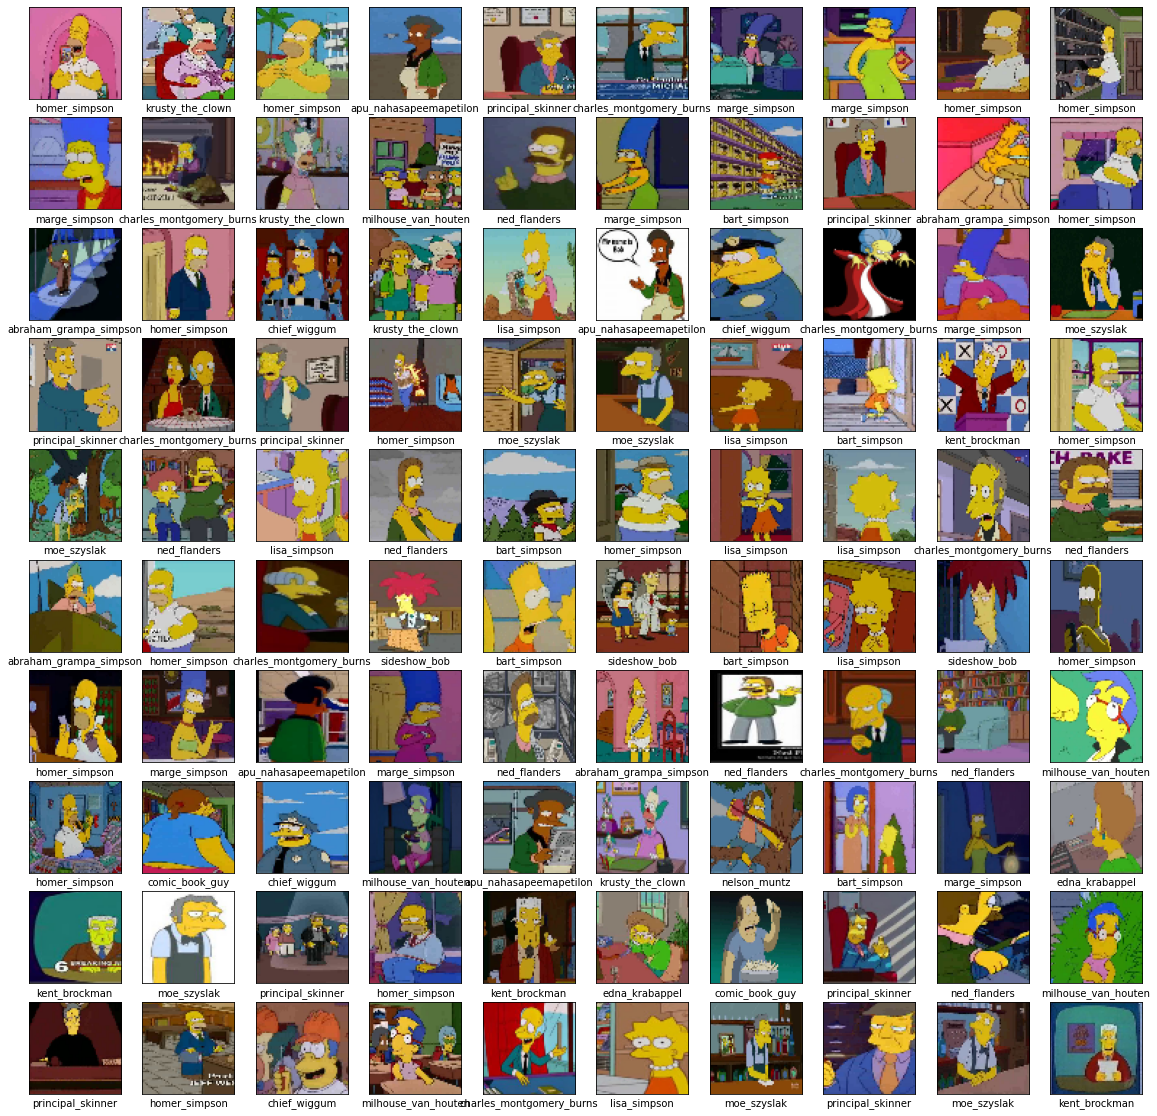

In [ ]:
from random import sample
lista = range(0,len(x_train))
lista_aleatoria=sample(lista,k=100)
j=0


# Ajustamos el tamaño de imagen
plt.figure(figsize=(20,20))
# Seleccionamos las 100 primeras imagenes
for i in lista_aleatoria:
    # Las visulizamos en 10 filas y 10 columnas
    plt.subplot(10,10,j+1)
    j=j+1
    plt.xticks([])
    plt.yticks([])
    # Omitimos el grid
    plt.grid(False)
    # Conversión de la imagen de BGR a RGB
    img = cv2.cvtColor(x_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    # Añadimos a cada imagen su etiqueta
    plt.xlabel(nombre_personajes[y_train[i]])

# Finalmente visualizamos
plt.show()

In [ ]:
# Commprobamos el número de imagenes junto con su formato
x_train.shape

(18992, 64, 64, 3)

In [ ]:
# Normalizacion
x_train = x_train / 255.0
x_test = x_test / 255.0

### Experimento 2:  Relu vs Tangente hiperbólica

Para la realización de este experimento tiene que utilizar los siguientes hiperparámetros:


*   Optimizer: SGD
*   Loss: sparse_categorical_crossentropy
*   Metrics: accuracy
*   EarlyStopping
      *   monitor=val_loss
      *   patience = 2
      *   verbose=1
*   Batch_size: 32




Construcción del modelo Relu.

In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping


# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(64,(2,2), activation='relu', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', name='Hidden-Layer-1'))
model.add(layers.Dense(64, activation='relu', name='Hidden-Layer-2'))
model.add(layers.Dense(18, activation='softmax', name='Output-Layer'))
model.summary()
# Compilación del modelo 
model.compile(optimizer=SGD(),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelRelu = model.fit(x_train, y_train, epochs = 30, batch_size= 32, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 64)        832       
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 64)       0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               8388736   
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                                 
 Output-Layer (Dense)        (None, 18)                1170      
                                                                 
Total params: 8,398,994
Trainable params: 8,398,994
Non-

In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping


# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(64,(2,2), activation='tanh', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh', name='Hidden-Layer-1'))
model.add(layers.Dense(64, activation='tanh', name='Hidden-Layer-2'))
model.add(layers.Dense(18, activation='softmax', name='Output-Layer'))
model.summary()
# Compilación del modelo 
model.compile(optimizer=SGD(),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelTanh = model.fit(x_train, y_train, epochs = 30, batch_size= 32, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 64)        832       
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 64)       0         
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               8388736   
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                                 
 Output-Layer (Dense)        (None, 18)                1170      
                                                                 
Total params: 8,398,994
Trainable params: 8,398,994
No

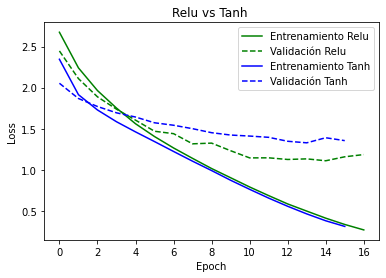

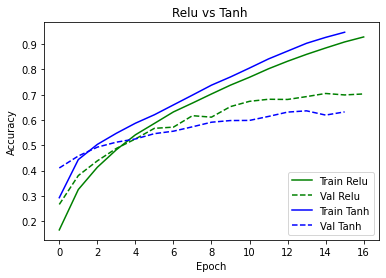

In [ ]:
plot_compare_losses(modelRelu, modelTanh, name1="Relu", name2="Tanh", title="Relu vs Tanh ")
plot_compare_accs(modelRelu, modelTanh, name1="Relu", name2="Tanh", title="Relu vs Tanh ")


In [ ]:
val_acc_relu=max(modelRelu.history['val_accuracy'])
val_acc_tanh=max(modelTanh.history['val_accuracy'])
val_loss_relu=max(modelRelu.history['val_loss'])
val_loss_tanh=max(modelTanh.history['val_loss'])
from prettytable import PrettyTable
 
myTable = PrettyTable(["Experimento", "Tipo", "Accuracy", "Loss"])
 
# Add rows
myTable.add_row(["2", "Relu", "{0:.5f}".format(val_acc_relu), "{0:.5f}".format(val_loss_relu)])
myTable.add_row(["2", "Tanh", "{0:.5f}".format(val_acc_tanh), "{0:.5f}".format(val_loss_tanh)])
print(myTable)


+-------------+------+----------+---------+
| Experimento | Tipo | Accuracy |   Loss  |
+-------------+------+----------+---------+
|      2      | Relu | 0.70492  | 2.44617 |
|      2      | Tanh | 0.63622  | 2.05282 |
+-------------+------+----------+---------+


#### Conclusión 
Ambas tienden a tener overfitting aunque la Relu se comporta mejor, el desempeño es mejor en Relu, esto puede ser debido a que Tangente hiperbólica aunque esta centrada en "0" como Relu tiene a matar gradientes a partir de un cierto valor de X, los incrementos de Y son muy pequeños en comparación con los X, eso supone que la derivada tiene 0, por lo que el gradiente será 0.*texto en cursiva* 

### Experimento 3: Zero vs Glorot uniform



In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping


# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(64,(2,2), activation='relu', kernel_initializer='zero', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',kernel_initializer='zero', name='Hidden-Layer-1'))
model.add(layers.Dense(64, activation='relu', kernel_initializer='zero',name='Hidden-Layer-2'))
model.add(layers.Dense(18, activation='softmax', kernel_initializer='zero', name='Output-Layer'))
model.summary()
# Compilación del modelo 
model.compile(optimizer=SGD(),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelZero = model.fit(x_train, y_train, epochs = 30, batch_size= 32, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 64)        832       
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 64)       0         
                                                                 
 flatten_2 (Flatten)         (None, 65536)             0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               8388736   
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                                 
 Output-Layer (Dense)        (None, 18)                1170      
                                                                 
Total params: 8,398,994
Trainable params: 8,398,994
No

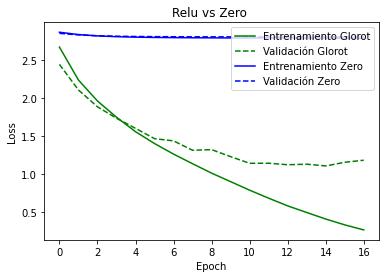

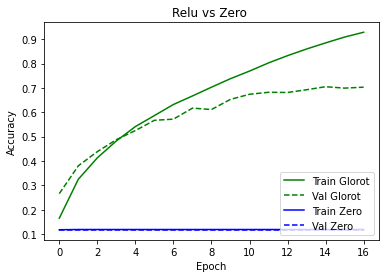

In [ ]:
plot_compare_losses(modelRelu, modelZero, name1="Glorot", name2="Zero", title="Relu vs Zero ")
plot_compare_accs(modelRelu, modelZero, name1="Glorot", name2="Zero", title="Relu vs Zero ")

In [ ]:
val_acc_zeros=max(modelZero.history['val_accuracy'])
val_loss_zeros=max(modelZero.history['val_loss'])
myTable.add_row(["3", "Zeros", "{0:.5f}".format(val_acc_zeros), "{0:.5f}".format(val_loss_zeros)])
print(myTable)



+-------------+-------+----------+---------+
| Experimento |  Tipo | Accuracy |   Loss  |
+-------------+-------+----------+---------+
|      2      |  Relu | 0.70492  | 2.44617 |
|      2      |  Tanh | 0.63622  | 2.05282 |
|      3      | Zeros | 0.11687  | 2.85424 |
+-------------+-------+----------+---------+


#### Conclusión


La inialización de todos los parámetros a 0 es un error a evitar.
El mismo valor en todos los parámetros hace que todas las neuronas tengan el mismo efecto en la entrada, lo cual provoca que el gradiente respecto a todos los pesos sea el mismo y, por tanto, los parámetros cambien de igual manera siempre. En la gráficas se puede apreciar esta circunstacia donde la red no aprende,.

### Experimento 4 - Aleatoria Normal vs Glorot uniform  


In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping


# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(64,(2,2), activation='relu', kernel_initializer='random_normal', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',kernel_initializer='random_normal', name='Hidden-Layer-1'))
model.add(layers.Dense(64, activation='relu', kernel_initializer='random_normal',name='Hidden-Layer-2'))
model.add(layers.Dense(18, activation='softmax', kernel_initializer='random_normal', name='Output-Layer'))
model.summary()
# Compilación del modelo 
model.compile(optimizer=SGD(),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelRandom = model.fit(x_train, y_train, epochs = 30, batch_size= 32, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 64)        832       
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 64)       0         
                                                                 
 flatten_3 (Flatten)         (None, 65536)             0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               8388736   
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                                 
 Output-Layer (Dense)        (None, 18)                1170      
                                                                 
Total params: 8,398,994
Trainable params: 8,398,994
No

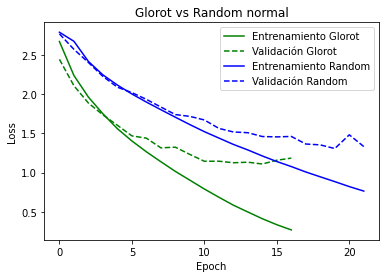

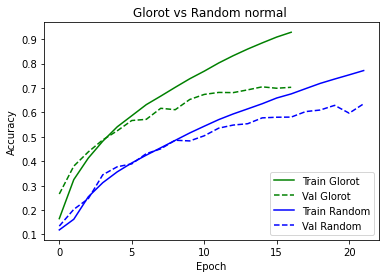

In [ ]:
plot_compare_losses(modelRelu, modelRandom, name1="Glorot", name2="Random", title="Glorot vs Random normal")
plot_compare_accs(modelRelu, modelRandom, name1="Glorot", name2="Random", title="Glorot vs Random normal ")

In [ ]:
val_acc_random=max(modelRandom.history['val_accuracy'])
val_loss_random=max(modelRandom.history['val_loss'])
myTable.add_row(["4", "Random", "{0:.5f}".format(val_acc_random), "{0:.5f}".format(val_loss_random)])
print(myTable)



+-------------+--------+----------+---------+
| Experimento |  Tipo  | Accuracy |   Loss  |
+-------------+--------+----------+---------+
|      2      |  Relu  | 0.70492  | 2.44617 |
|      2      |  Tanh  | 0.63622  | 2.05282 |
|      3      | Zeros  | 0.11687  | 2.85424 |
|      4      | Random | 0.63543  | 2.77165 |
+-------------+--------+----------+---------+


#### Conclusión

El tipo ramdom normal puede generar tener pesos pequeños puede acabar haciendo que los valores de salida se vayan aproximando a 0 y que los gradientes mueran. En las gráficas se puede apreciar que el modelo entrena pero el desempeño es mucho menor que Relu.


###Experimento 5 - SGD vs RMSprop




In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping


# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(64,(2,2), activation='relu', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',name='Hidden-Layer-1'))
model.add(layers.Dense(64, activation='relu',name='Hidden-Layer-2'))
model.add(layers.Dense(18, activation='softmax', kernel_initializer='random_normal', name='Output-Layer'))
model.summary()
# Compilación del modelo 
model.compile(optimizer=RMSprop(),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelRmsprop= model.fit(x_train, y_train, epochs = 30, batch_size= 32, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 64)        832       
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 64)       0         
                                                                 
 flatten_4 (Flatten)         (None, 65536)             0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               8388736   
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                                 
 Output-Layer (Dense)        (None, 18)                1170      
                                                                 
Total params: 8,398,994
Trainable params: 8,398,994
No

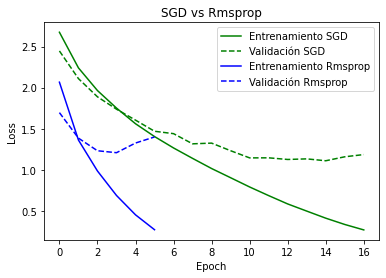

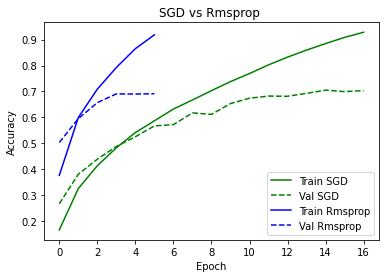

In [ ]:
plot_compare_losses(modelRelu, modelRmsprop, name1="SGD", name2="Rmsprop", title="SGD vs Rmsprop")
plot_compare_accs(modelRelu, modelRmsprop, name1="SGD", name2="Rmsprop", title="SGD vs Rmsprop ")

In [ ]:
val_acc_rmsprop=max(modelRmsprop.history['val_accuracy'])
val_loss_rmsprop=max(modelRmsprop.history['val_loss'])
myTable.add_row(["5", "Rmsprop", "{0:.5f}".format(val_acc_rmsprop), "{0:.5f}".format(val_loss_rmsprop)])
print(myTable)



+-------------+---------+----------+---------+
| Experimento |   Tipo  | Accuracy |   Loss  |
+-------------+---------+----------+---------+
|      2      |   Relu  | 0.70492  | 2.44617 |
|      2      |   Tanh  | 0.63622  | 2.05282 |
|      3      |  Zeros  | 0.11687  | 2.85424 |
|      4      |  Random | 0.63543  | 2.77165 |
|      5      | Rmsprop | 0.69097  | 1.69545 |
+-------------+---------+----------+---------+


####Conclusión
Pese a que ha ido más rápido el entrenamiento no hemos conseguido superar el modelo inicial. Por lo que un método de adaptativo como Rmsprop para este caso no hemos conseguido mejor desempeño.

###Experimento 6: SGD vs Adamax

Probar con learning_rate=0.002, beta_1=0.9, beta_2=0.999

In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping


# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(64,(2,2), activation='relu', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', name='Hidden-Layer-1'))
model.add(layers.Dense(64, activation='relu', name='Hidden-Layer-2'))
model.add(layers.Dense(18, activation='softmax', name='Output-Layer'))
model.summary()
# Compilación del modelo 
model.compile(optimizer=Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelAdamax = model.fit(x_train, y_train, epochs = 30, batch_size= 32, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 64)        832       
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 64)       0         
                                                                 
 flatten_5 (Flatten)         (None, 65536)             0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               8388736   
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                                 
 Output-Layer (Dense)        (None, 18)                1170      
                                                                 
Total params: 8,398,994
Trainable params: 8,398,994
No

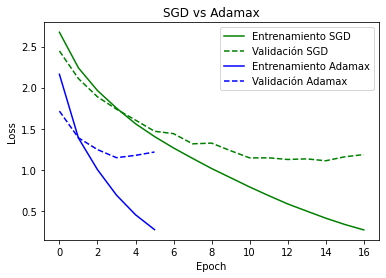

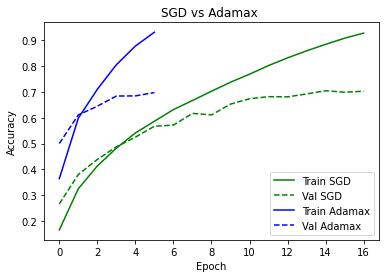

In [ ]:
plot_compare_losses(modelRelu, modelAdamax, name1="SGD", name2="Adamax", title="SGD vs Adamax")
plot_compare_accs(modelRelu, modelAdamax, name1="SGD", name2="Adamax", title="SGD vs Adamax ")

In [ ]:
val_acc_adamax=max(modelAdamax.history['val_accuracy'])
val_loss_adamax=max(modelAdamax.history['val_loss'])
myTable.add_row(["6", "Adamax", "{0:.5f}".format(val_acc_adamax), "{0:.5f}".format(val_loss_adamax)])
print(myTable)

+-------------+---------+----------+---------+
| Experimento |   Tipo  | Accuracy |   Loss  |
+-------------+---------+----------+---------+
|      2      |   Relu  | 0.70492  | 2.44617 |
|      2      |   Tanh  | 0.63622  | 2.05282 |
|      3      |  Zeros  | 0.11687  | 2.85424 |
|      4      |  Random | 0.63543  | 2.77165 |
|      5      | Rmsprop | 0.69097  | 1.69545 |
|      6      |  Adamax | 0.69782  | 1.71386 |
+-------------+---------+----------+---------+


####  Conclusión

Ha ocurrido lo mismo que con RMSprop pese a entrenar más rápido, estan basados en el momentum no han conseguido mejorar el desempeño de la SGD.

###Experimento 7: Aumento batch size 512

In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping


# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(64,(2,2), activation='relu', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',name='Hidden-Layer-1'))
model.add(layers.Dense(64, activation='relu',name='Hidden-Layer-2'))
model.add(layers.Dense(18, activation='softmax', kernel_initializer='random_normal', name='Output-Layer'))
model.summary()
# Compilación del modelo 
model.compile(optimizer=SGD(),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelBatchsize= model.fit(x_train, y_train, epochs = 30, batch_size= 512, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 64)        832       
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 64)       0         
                                                                 
 flatten_6 (Flatten)         (None, 65536)             0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               8388736   
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                                 
 Output-Layer (Dense)        (None, 18)                1170      
                                                                 
Total params: 8,398,994
Trainable params: 8,398,994
No

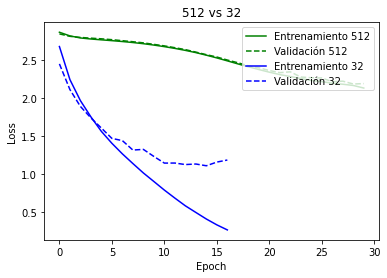

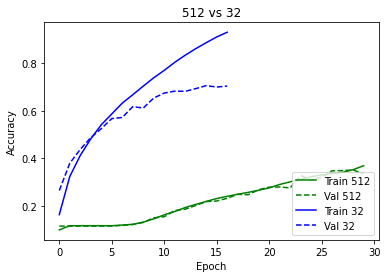

In [ ]:
plot_compare_losses(modelBatchsize, modelRelu, name1="512", name2="32", title="512 vs 32")
plot_compare_accs(modelBatchsize, modelRelu, name1="512", name2="32", title="512 vs 32")

In [ ]:
val_acc_modelBatchsize=max(modelBatchsize.history['val_accuracy'])
val_loss_modelBatchsize=max(modelBatchsize.history['val_loss'])
myTable.add_row(["7", "Batchsize", "{0:.5f}".format(val_acc_modelBatchsize), "{0:.5f}".format(val_loss_modelBatchsize)])
print(myTable)

+-------------+-----------+----------+---------+
| Experimento |    Tipo   | Accuracy |   Loss  |
+-------------+-----------+----------+---------+
|      2      |    Relu   | 0.70492  | 2.44617 |
|      2      |    Tanh   | 0.63622  | 2.05282 |
|      3      |   Zeros   | 0.11687  | 2.85424 |
|      4      |   Random  | 0.63543  | 2.77165 |
|      5      |  Rmsprop  | 0.69097  | 1.69545 |
|      6      |   Adamax  | 0.69782  | 1.71386 |
|      7      | Batchsize | 0.35193  | 2.83996 |
+-------------+-----------+----------+---------+


#### Conclusión

Es muy importante tener en cuenta que el learning rate está relacionado con el batch size, al subir el batch size generalmente se recomienda bajar el learning rate para que no ocurran problemas como los que hemos podido apreciar en el experimento 7.

### Experimento 8 - Aplicar BatchNormalization

In [ ]:
from keras import layers 
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Activation

# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(64,(2,2), activation='relu', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',kernel_initializer='random_normal', name='Hidden-Layer-1'))
model.add(BatchNormalization())
model.add(layers.Dense(64, activation='relu', kernel_initializer='random_normal',name='Hidden-Layer-2'))
model.add(BatchNormalization())
model.add(layers.Dense(18, activation='softmax', kernel_initializer='random_normal', name='Output-Layer'))

model.summary()
# Compilación del modelo 
model.compile(optimizer=SGD(),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelNormalization= model.fit(x_train, y_train, epochs = 30, batch_size= 32, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 64)        832       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 64)       0         
                                                                 
 flatten_7 (Flatten)         (None, 65536)             0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 128)               8388736   
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

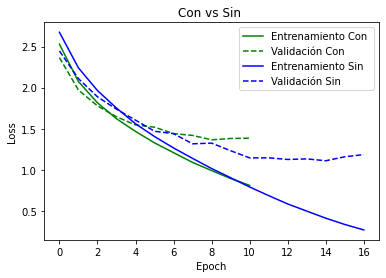

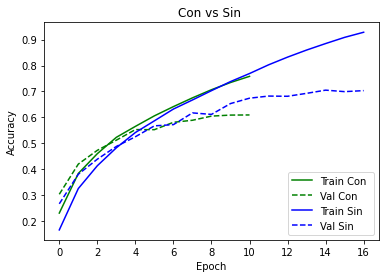

In [ ]:
plot_compare_losses(modelNormalization, modelRelu, name1="Con ", name2="Sin ", title="Con vs Sin ")
plot_compare_accs(modelNormalization, modelRelu, name1="Con ", name2="Sin ", title="Con vs Sin ")

In [ ]:
val_acc_modelNormalization=max(modelNormalization.history['val_accuracy'])
val_loss_modelBNormalization=max(modelNormalization.history['val_loss'])
myTable.add_row(["8", "Normalization", "{0:.5f}".format(val_acc_modelNormalization), "{0:.5f}".format(val_loss_modelBNormalization)])
print(myTable)

+-------------+---------------+----------+---------+
| Experimento |      Tipo     | Accuracy |   Loss  |
+-------------+---------------+----------+---------+
|      2      |      Relu     | 0.70492  | 2.44617 |
|      2      |      Tanh     | 0.63622  | 2.05282 |
|      3      |     Zeros     | 0.11687  | 2.85424 |
|      4      |     Random    | 0.63543  | 2.77165 |
|      5      |    Rmsprop    | 0.69097  | 1.69545 |
|      6      |     Adamax    | 0.69782  | 1.71386 |
|      7      |   Batchsize   | 0.35193  | 2.83996 |
|      8      | Normalization | 0.60911  | 2.36552 |
+-------------+---------------+----------+---------+


#### Conclusión
Esta red tiene muy pocas capas, por lo que los valores que tenemos son pequeños, debido a esto batchNormalization no ha tenido ninguna clase de mejora.

### Experimento 9 - Aumentar el número de parámentros por capa

Aumentar de la siguiente manera:

*   512 a la Conv2D
*   512 a la primera Dense
*   256 a la segunda Dense



In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping


# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(512,(2,2), activation='relu', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', name='Hidden-Layer-1'))
model.add(layers.Dense(256, activation='relu', name='Hidden-Layer-2'))
model.add(layers.Dense(18, activation='softmax', name='Output-Layer'))
model.summary()
# Compilación del modelo 
model.compile(optimizer=SGD(),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelMasCapa = model.fit(x_train, y_train, epochs = 30, batch_size= 32, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 512)       6656      
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 512)      0         
                                                                 
 flatten_11 (Flatten)        (None, 524288)            0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 512)               268435968 
                                                                 
 Hidden-Layer-2 (Dense)      (None, 256)               131328    
                                                                 
 Output-Layer (Dense)        (None, 18)                4626      
                                                                 
Total params: 268,578,578
Trainable params: 268,578,5

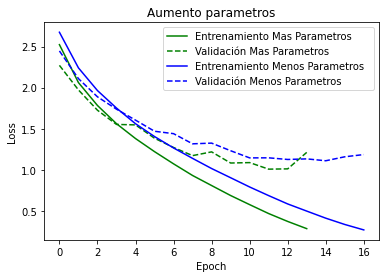

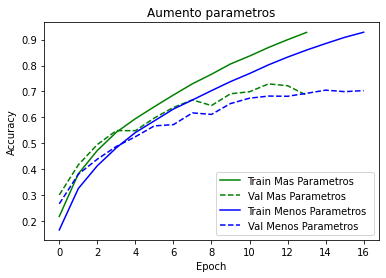

In [ ]:
plot_compare_losses(modelMasCapa, modelRelu, name1="Mas Parametros", name2="Menos Parametros  ", title="Aumento parametros")
plot_compare_accs(modelMasCapa, modelRelu, name1="Mas Parametros", name2="Menos Parametros ", title="Aumento parametros")

In [ ]:
val_acc_mas_capa=max(modelMasCapa.history['val_accuracy'])
val_loss_mas_capa=max(modelMasCapa.history['val_loss'])
myTable.add_row(["9", "Mas Parámetros", "{0:.5f}".format(val_acc_mas_capa), "{0:.5f}".format(val_loss_mas_capa)])
print(myTable)

+-------------+----------------+----------+---------+
| Experimento |      Tipo      | Accuracy |   Loss  |
+-------------+----------------+----------+---------+
|      2      |      Relu      | 0.70492  | 2.44617 |
|      2      |      Tanh      | 0.63622  | 2.05282 |
|      3      |     Zeros      | 0.11687  | 2.85424 |
|      4      |     Random     | 0.63543  | 2.77165 |
|      5      |    Rmsprop     | 0.69097  | 1.69545 |
|      6      |     Adamax     | 0.69782  | 1.71386 |
|      7      |   Batchsize    | 0.35193  | 2.83996 |
|      8      | Normalization  | 0.60911  | 2.36552 |
|      9      | Mas Parámetros | 0.72914  | 2.27094 |
+-------------+----------------+----------+---------+


#### Conclusión

La red neuronal también es una función, dependiente de los parámetros w y b y de la imagen x. Definiremos esta función como a(x, w, b) o como a para simplificar. Cuanto más parámetros la red tendrá más capacidad de generalización, por el contrario le costará más la parte de entrenamiento.


### Experimento 10 - Aplicar Dropout 0.2

In [ ]:
from keras import layers
from keras import models
from keras.optimizers import Adamax, RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.layers import Dropout




# Definición y construcción del modelo 
model = models.Sequential()
model.add(layers.Conv2D(512,(2,2), activation='relu', input_shape=(64, 64, 3), padding='same', name='Convolutiva-1'))
model.add(layers.MaxPooling2D(pool_size=(2,2), name='MaxPooling-1'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', name='Hidden-Layer-1'))
model.add(Dropout(0.2))
model.add(layers.Dense(256, activation='relu', name='Hidden-Layer-2'))
model.add(Dropout(0.2))
model.add(layers.Dense(18, activation='softmax', name='Output-Layer'))
model.add(Dropout(0.2))
model.summary()
# Compilación del modelo 
model.compile(optimizer=SGD(),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
# El log del entrenamiento lo guardamos para su posterior análisis y visualización

Parada_Temprana = EarlyStopping(monitor='val_loss', patience = 2, verbose=1)

modelDrop02 = model.fit(x_train, y_train, epochs = 30, batch_size= 32, 
                      validation_split=0.2, 
                      verbose = 1,  
                      callbacks = [Parada_Temprana])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolutiva-1 (Conv2D)      (None, 64, 64, 512)       6656      
                                                                 
 MaxPooling-1 (MaxPooling2D)  (None, 32, 32, 512)      0         
                                                                 
 flatten_12 (Flatten)        (None, 524288)            0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 512)               268435968 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 Hidden-Layer-2 (Dense)      (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)             

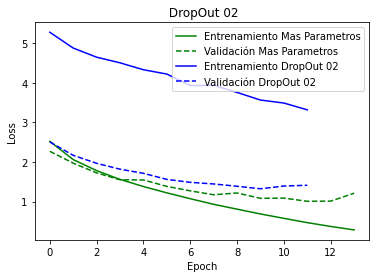

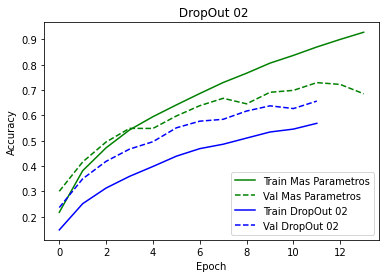

In [ ]:
plot_compare_losses(modelMasCapa, modelDrop02, name1="Mas Parametros", name2="DropOut 02", title=" DropOut 02")
plot_compare_accs(modelMasCapa, modelDrop02, name1="Mas Parametros", name2="DropOut 02", title=" DropOut 02")

In [ ]:
val_acc_drop_02=max(modelDrop02.history['val_accuracy'])
val_loss_drop_02=max(modelDrop02.history['val_loss'])
myTable.add_row(["10", "Drop 0.2", "{0:.5f}".format(val_acc_drop_02), "{0:.5f}".format(val_loss_drop_02)])
print(myTable)

+-------------+----------------+----------+---------+
| Experimento |      Tipo      | Accuracy |   Loss  |
+-------------+----------------+----------+---------+
|      2      |      Relu      | 0.70492  | 2.44617 |
|      2      |      Tanh      | 0.63622  | 2.05282 |
|      3      |     Zeros      | 0.11687  | 2.85424 |
|      4      |     Random     | 0.63543  | 2.77165 |
|      5      |    Rmsprop     | 0.69097  | 1.69545 |
|      6      |     Adamax     | 0.69782  | 1.71386 |
|      7      |   Batchsize    | 0.35193  | 2.83996 |
|      8      | Normalization  | 0.60911  | 2.36552 |
|      9      | Mas Parámetros | 0.72914  | 2.27094 |
|      10     |    Drop 0.2    | 0.65623  | 2.50806 |
+-------------+----------------+----------+---------+


#### Conclusión
Es una red con muy pocas capas, debido a eso realizar DropOut genera redes muy parecidas en cada batch.

###Anexo 1 - Problema de la RAM en la GPU

Durante el laboratorio hemos tenido problemas con la memoria de la GPU, eso es debido a qué es un recurso muy limitado. En el aprendizaje estamos realizando calculo matriciales qué son muy costosos.
A modo de ejemplo unos datos de ChatGPT3:


*   175 MIL MILLONES de parámetros.
*   Tardariamos 355  para entrenar el modelo utilizando sólo una GPU.



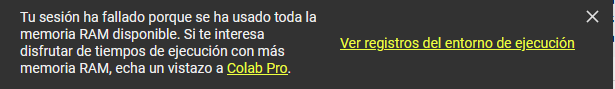